In [1]:
#https://www.youtube.com/watch?v=hA0qyW-w3pQ

## Import all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from encodings.aliases import aliases # Python has a file containing a dictionary of encoding names and associated aliases

# the matplotlib plots will appear directly below the cell in which the plot function was called
%matplotlib inline

### Read in the CSV file and remove duplicates

In [3]:
# to find encodings that work

# Below line creates a set of all available encodings

alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv('crime.csv', nrows=10, encoding=encoding) #read in only 10 rows for faster read
        print("Succesful", encoding)
    except:
        pass

Succesful latin_1
Succesful cp850
Succesful cp860
Succesful cp273
Succesful cp1125
Succesful iso8859_4
Succesful iso8859_9
Succesful mac_turkish
Succesful cp775
Succesful cp862
Succesful iso8859_15
Succesful mbcs
Succesful cp932
Succesful utf_16_be
Succesful iso8859_10
Succesful cp866
Succesful cp858
Succesful cp1255
Succesful koi8_r
Succesful iso8859_7
Succesful iso8859_14
Succesful cp1254
Succesful cp861
Succesful cp500
Succesful cp1026
Succesful utf_16_le
Succesful cp1251
Succesful mac_roman
Succesful big5hkscs
Succesful cp869
Succesful mac_iceland
Succesful iso8859_2
Succesful cp1257
Succesful cp1140
Succesful mac_greek
Succesful gbk
Succesful iso8859_8
Succesful iso8859_11
Succesful cp1253
Succesful gb18030
Succesful ptcp154
Succesful cp1252
Succesful cp852
Succesful cp949
Succesful cp1258
Succesful hp_roman8
Succesful kz1048
Succesful cp1250
Succesful mac_latin2
Succesful cp1256
Succesful cp857
Succesful iso8859_16
Succesful mac_cyrillic
Succesful cp864
Succesful iso8859_5
Succes

In [4]:
# Read in the crime.csv file and use the timestamp as the index
crime = pd.read_csv('crime.csv', encoding='ISO-8859-11')

In [5]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [6]:
crime.shape #Checking the shape of the data, it has 319073 rows and 17 columns

(319073, 17)

In [7]:
crime.duplicated().sum() #Checking the duplicated rows

23

In [8]:
crime.drop_duplicates(inplace=True) #Dropping the duplicated rows

In [9]:
crime.shape #Checking the shape of the data if dropping the duplicates worked

(319050, 17)

## Explore the Dataset

In [10]:
crime.head() #Quick check of the dataset

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [11]:
crime.tail() #Qucik check of the 5 last rows of the dataset

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [12]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [13]:
crime.info() #Summary information about the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long             

In [14]:
# Changing the data type from object to datetime for Occured On Date column
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE) 

In [15]:
# Check if it worked
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET        

In [16]:
# Easily extract datetime information from the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE.dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [17]:
crime.OCCURRED_ON_DATE.dt.month

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [18]:
crime.OCCURRED_ON_DATE.dt.week

C:\Users\hp\AppData\Local\Temp\ipykernel_4048\2588699237.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  crime.OCCURRED_ON_DATE.dt.week


0         35
1         34
2         36
3         36
4         36
          ..
319068    22
319069    28
319070    28
319071    22
319072    26
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [19]:
crime.OCCURRED_ON_DATE.dt.hour

0         13
1          0
2         19
3         21
4         21
          ..
319068    17
319069    13
319070    13
319071    19
319072     0
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [20]:
crime.OCCURRED_ON_DATE.dt.minute

0          0
1          0
2         27
3         16
4          5
          ..
319068    25
319069    38
319070    38
319071    35
319072    12
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [21]:
crime.describe() #summary information on the columns

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [22]:
crime.describe(include="object") #summary information on the non-numeric columns

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [23]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [24]:
crime.isnull() #returns a dataframe with True and False

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319069,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319070,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319071,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [25]:
# Checking for columns with missing value
crime.columns[np.sum(crime.isnull())!=0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [26]:
# Checking for columns with no missing value
crime.columns[np.sum(crime.isnull())==0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [27]:
# Checking for the number of unique values
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col + " has " + str(unique_count) + " unique values")

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 233229 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18178 unique values
Long has 18178 unique values
Location has 18194 unique values


## Let's answer some questions!

### What are the most common crimes in terms of offense group?

In [28]:
crime.OFFENSE_CODE_GROUP.value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: OFFENSE_CODE_GROUP, dtype: float64

Text(0.5, 0, 'Offense Groups')

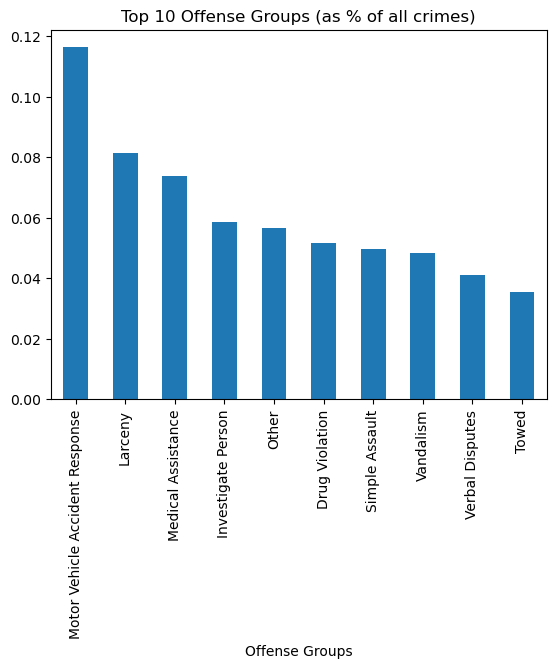

In [29]:
offense_group_val = crime.OFFENSE_CODE_GROUP.value_counts()[:10]

display(offense_group_val/crime.shape[0])

#Create a bar chart of the Top 10 Offense Groups
(offense_group_val/crime.shape[0]).plot(kind="bar")
plt.title("Top 10 Offense Groups (as % of all crimes)")
plt.xlabel("Offense Groups")


### What are the least common crimes in terms of offense group?

In [30]:
crime.OFFENSE_CODE_GROUP.value_counts(ascending=True)[:10]

Burglary - No Property Taken                  2
Biological Threat                             2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: OFFENSE_CODE_GROUP, dtype: int64

Burglary - No Property Taken                 0.000006
Biological Threat                            0.000006
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE    0.000006
INVESTIGATE PERSON                           0.000013
HUMAN TRAFFICKING                            0.000022
Gambling                                     0.000025
Manslaughter                                 0.000025
Explosives                                   0.000085
Phone Call Complaints                        0.000097
Aircraft                                     0.000113
Name: OFFENSE_CODE_GROUP, dtype: float64

Text(0.5, 0, 'Offense Groups')

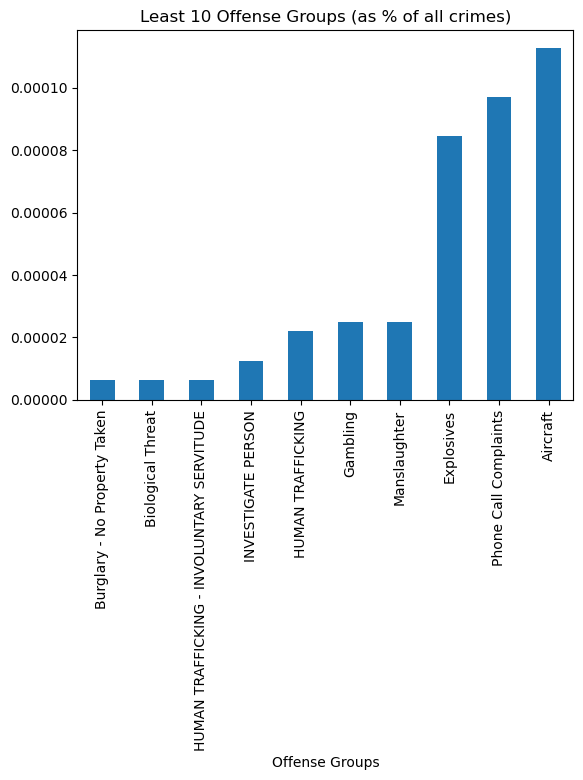

In [31]:
least_offense_group_val = crime.OFFENSE_CODE_GROUP.value_counts(ascending=True)[:10]

display(least_offense_group_val/crime.shape[0])

#Create a bar chart of the Top 10 Offense Groups
(least_offense_group_val/crime.shape[0]).plot(kind="bar")
plt.title("Least 10 Offense Groups (as % of all crimes)")
plt.xlabel("Offense Groups")


### What are the Most Common Offense Descriptions?

In [32]:
crime.OFFENSE_DESCRIPTION.value_counts()

SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15153
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
KILLING OF FELON BY POLICE                         1
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON         1
DRUGS - GLUE INHALATION                            1
ROBBERY - KNIFE - STREET                           1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: OFFENSE_DESCRIPTION, Length: 244, dtype: int64

SICK/INJURED/MEDICAL - PERSON            0.058872
INVESTIGATE PERSON                       0.058778
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051161
VANDALISM                                0.047494
ASSAULT SIMPLE - BATTERY                 0.046360
VERBAL DISPUTE                           0.041056
TOWED MOTOR VEHICLE                      0.035377
INVESTIGATE PROPERTY                     0.034866
LARCENY THEFT FROM BUILDING              0.028425
THREATS TO DO BODILY HARM                0.028340
Name: OFFENSE_DESCRIPTION, dtype: float64

Text(0.5, 1.0, 'Top 10 Offense Descriptions (as % of all crimes)')

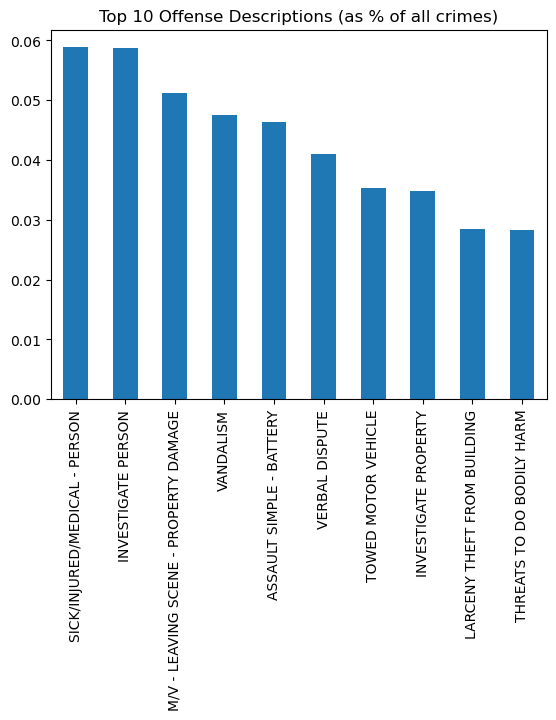

In [33]:
offense_desc_vals = crime.OFFENSE_DESCRIPTION.value_counts()[:10]

display(offense_desc_vals/crime.shape[0])

#Create a bar chart of the Top 10 Offense Groups
(offense_desc_vals/crime.shape[0]).plot(kind="bar")
plt.title("Top 10 Offense Descriptions (as % of all crimes)")

### In which year was the Most Crimes Committed?

In [34]:
crime.groupby('YEAR').count()['INCIDENT_NUMBER']

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Number of Crimes')

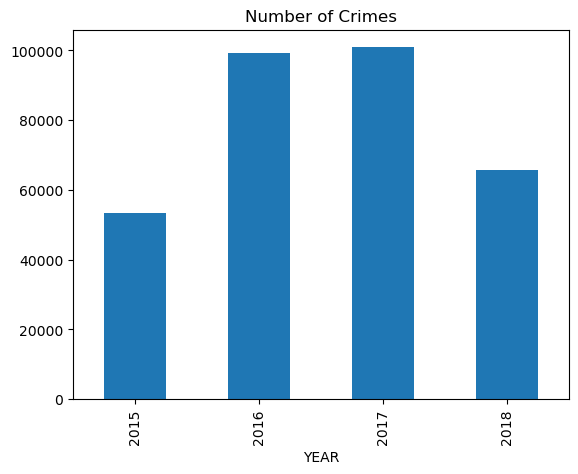

In [35]:
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind="bar");
plt.title("Number of Crimes")

### Are there more crimes committed on specific days?

DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
Tuesday      46376
Monday       45674
Saturday     44816
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Number of Crimes')

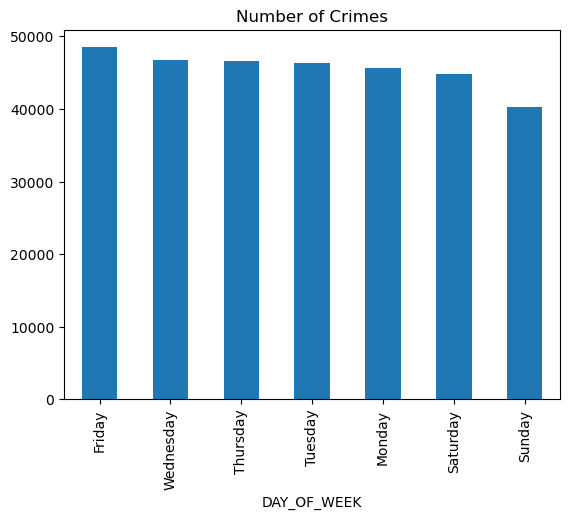

In [36]:
display(crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False))

crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False).plot(kind="bar");
plt.title("Number of Crimes")

### Are there more crimes committed on specific hours?

Text(0.5, 1.0, 'Crimes Commited on Specific Hours')

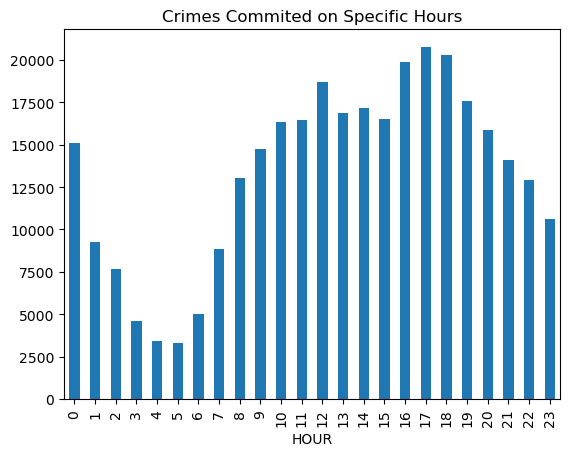

In [37]:
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind="bar");
plt.title("Crimes Commited on Specific Hours")

### On what days and which hours are the most crime committed?

In [38]:
crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER']

HOUR  DAY_OF_WEEK
0     Friday         2161
      Monday         2000
      Saturday       2612
      Sunday         2400
      Thursday       2039
                     ... 
23    Saturday       1951
      Sunday         1380
      Thursday       1492
      Tuesday        1296
      Wednesday      1298
Name: INCIDENT_NUMBER, Length: 168, dtype: int64

In [39]:
week_and_hour=crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
week_and_hour

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


In [40]:
week_and_hour.columns=['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']

<Axes: ylabel='HOUR'>

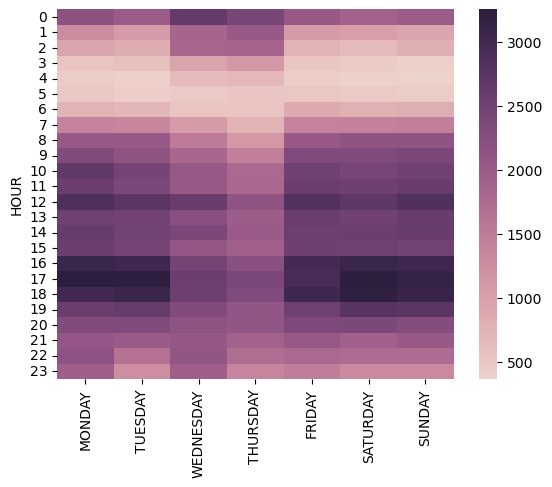

In [41]:
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True))

### In which months were the number of crimes below average?
### In which months on average did the most crimes occur?

In [42]:
#if the value is less then the average crime, highlight the value in blue

avg_crime=crime.groupby(['MONTH','YEAR']).count()['INCIDENT_NUMBER'].mean()
print("The Average number of Crimes is " + str(avg_crime))

year_and_month=crime.groupby(['MONTH',"YEAR"]).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v,props=''):
    return props if v < avg_crime else None
s2=year_and_month.style.applymap(style_negative,props='color:blue;')\
    .applymap(lambda v:'opacity:20%;' if(v<0.3) and (v>-0.3) else None)
s2

The Average number of Crimes is 7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [43]:
# Use apply to highlight the maximum in a column in darkgreen
def highlight_max(s,props):
    return np.where(s==np.nanmax(s.values),props,'')
s2.apply(highlight_max,props='color:white;background-color:darkgreen', axis=0)

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


### In which districts were the most crimes commited on a yearly basis?

<Axes: xlabel='YEAR', ylabel='DISTRICT'>

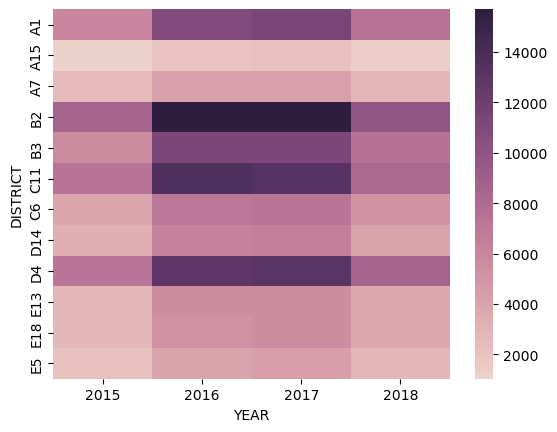

In [44]:
district_and_year=crime.groupby(['DISTRICT',"YEAR"]).count()['INCIDENT_NUMBER'].unstack()
sns.heatmap(district_and_year, cmap=sns.cubehelix_palette(as_cmap=True))

In [45]:
# if the value is less than the average crime per district per year, highlight the value in blue
avg_crime_district = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].mean()
print("The average crime per district per year is: " + str(avg_crime_district))

def style_negative(v, props=''):
    return props if v < avg_crime_district else None
s3 = district_and_year.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s3

The average crime per district per year is: 6610.104166666667


YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


In [46]:
# Use apply to highlight the maximum in a column in darkgreen
def highlight_max(s,props):
    return np.where(s==np.nanmax(s.values),props,'')
s3.apply(highlight_max,props='color:white;background-color:darkgreen', axis=0)

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601
